## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [488]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [489]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data.head(5) #первые 5 строк

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [490]:
data.tail(5) #последние 5 строк

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [491]:
data.shape #размер

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [492]:
if any(data.isna().mean()):
    print('some missing values:', data.isna().mean())
else:
    print('no missing values:\n', data.isna().mean())
#видим, что пропусков в данных нет, т.к. все значения = 0


no missing values:
 status                     0.0
duration                   0.0
credit_history             0.0
purpose                    0.0
amount                     0.0
savings                    0.0
employment_duration        0.0
installment_rate           0.0
personal_status_sex        0.0
other_debtors              0.0
present_residence          0.0
property                   0.0
age                        0.0
other_installment_plans    0.0
housing                    0.0
number_credits             0.0
job                        0.0
people_liable              0.0
telephone                  0.0
foreign_worker             0.0
credit_risk                0.0
dtype: float64


Определим числовые признаки:

In [493]:
data.describe() #describe показывает информацию для числовых признаков
# видим, что duration, amount, age  - числовые.

# Также они не являются бинарными: возраст может быть различным, длительность тоже, кредитная сумма варьируется, они имеют математическое значение, не делятся на подгруппы.
# Подтверждением  является наличие более 2-х уникальных значений:
if data.age.nunique()==2 or data.amount.nunique()==2 or data.duration.nunique() == 2:
    print('бинарный есть среди числовых')
else:
    print('Признаки [duration, amount, age] являются числовыми, не бинарными')

Признаки [duration, amount, age] являются числовыми, не бинарными


Найдем бинарные признаки:

In [494]:
a = []
for i in data.columns:
    if data[i].nunique() == 2:
        a.append(i)
print('Признаки ', a, ' - бинарного типа')
#Действительно, в описании сказано, что 'telephone', 'foreign_worker', 'credit_risk' - binary variable indicating
# Признак 'people_liable' тоже можно считать бинарным, т.к. количество людей разбито на 2 группы: (от 0 до 2) и (от 3 и более), можно ориентироваться по принципу "левее-правее" относительно 3

Признаки  ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']  - бинарного типа


 Посмотрим на оставшиеся признаки, определим категориальный и порядковые:

In [495]:
data1 = data.loc[:, ~data.columns.isin(['people_liable', 'telephone', 'foreign_worker', 'credit_risk', 'duration', 'amount', 'age'])]

d = pd.DataFrame.from_dict({i:data1[i].unique() for i in data1.columns}, orient='index').transpose()
d # выведем все возможные значения признаков, дополнив до максимальной длины =10 значениями None. Ранее мы уже доказали, что пустых значений нет


,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job
0,no checking account,all credits at this bank paid back duly,car (used),unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,none,for free,1,skilled employee/official
1,... < 0 DM,no credits taken/all credits paid back duly,others,... < 100 DM,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,guarantor,1 <= ... < 4 yrs,unknown / no property,bank,rent,2-3,unskilled - resident
2,... >= 200 DM / salary for at least 1 year,existing credits paid back duly till now,retraining,100 <= ... < 500 DM,4 <= ... < 7 yrs,20 <= ... < 25,female : single,co-applicant,4 <= ... < 7 yrs,building soc. savings agr./life insurance,stores,own,4-5,unemployed/unskilled - non-resident
3,0<= ... < 200 DM,delay in paying off in the past,furniture/equipment,... >= 1000 DM,unemployed,>= 35,male : divorced/separated,None,< 1 yr,real estate,None,None,>= 6,manager/self-empl./highly qualif. employee
4,None,critical account/other credits elsewhere,car (new),500 <= ... < 1000 DM,>= 7 yrs,None,None,None,None,None,None,None,None,None
5,None,None,business,None,None,None,None,None,None,None,None,None,None,None
6,None,None,domestic appliances,None,None,None,None,None,None,None,None,None,None,None
7,None,None,radio/television,None,None,None,None,None,None,None,None,None,None,None
8,None,None,repairs,None,None,None,None,None,None,None,None,None,None,None
9,None,None,vacation,None,None,None,None,None,None,None,None,None,None,None


очевидно, что purpose, personal_status_sex, housing, credit_history, property являются категориальными признаками, т.к. не имеют порядка и нельзя оценить преимущества одной группы над другой, выражаются смысловым понятием
other_installment_plans - категориальный признак - выражается смысловым понятием
other_debtors - категориальный признак - выражается смысловым понятием, трудно определить, какой показатель "приоритетнее" другого

In [496]:
print('purpose, personal_status_sex, housing, credit_history, property, other_installment_plans, other_debtors - категориальные')

purpose, personal_status_sex, housing, credit_history, property, other_installment_plans, other_debtors - категориальные


employment_duration - порядковый, т.к. можно ранжировать. Также есть подтверждение в описании датасета
savings - можно упорядочить от unknown/no savings account до ...>=1000 dm по возрастанию, т.к. вероятнее дадут кредит тому, кто имеет какие-либо накопления (чем больше, тем лучше) на счету -> порядковый
status - можно упорядочить от no checking account до ...>=200 dm по возрастанию, аналогично с savings -> порядковый
 installment_rate - можно упорядочить по ставке от дохода от <20 до ...>=35 по возрастанию -> порядковый
 present_residence - можно упорядочить по количеству лет в текущем месте, показывает стабильность проживания-> порядковый
number_credits - можно упорядочить по колчиству взятых крядитов -> порядковый

job - порядковый, т.к. можно утверждать, что человеку с характеристикой manager/self-empl./highly qualif. employee с большей вероятностью выдадут кредит, чем unemployed/unskilled - non-resident. Он в приоритете. Также наличие жительства recidence влияет положительно. Ранжирование по возрастанию: unemployed/unskilled - non-resident -> skilled employee/official ->unskilled - resident -> unemployed/unskilled - non-resident


In [497]:
print('savings, employment_duration, status, installment_rate, present_residence, number_credits, job - порядковые')

savings, employment_duration, status, installment_rate, present_residence, number_credits, job - порядковые


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [498]:
data.groupby('purpose').amount.mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [499]:
mask30 = data['age'] < 30
mask40 = data['age'] > 40
mask2 = (data['housing'] == 'rent')

print(len(data[mask30 & mask2]) / len(data[mask30]) * 100, '% клиентов моложе 30 лет снимает жилье')
print(len(data[mask40 & mask2]) / len(data[mask40]) * 100, '% клиентов старше 40 лет снимает жилье')

66.66666666666666 % клиентов моложе 30 лет снимает жилье
68.01470588235294 % клиентов старше 40 лет снимает жилье


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [500]:
foreign = data['foreign_worker'] == 'yes'
credits = data.number_credits.isin(['>= 6', '4-5'])
print(len(data[foreign & credits]))


1


### Задание 6 (1 балл)

In [501]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

каким должен получиться график:

<img src="1.png " width="800" height="400">

In [502]:
plt.rcParams["figure.figsize"] = (12, 9)

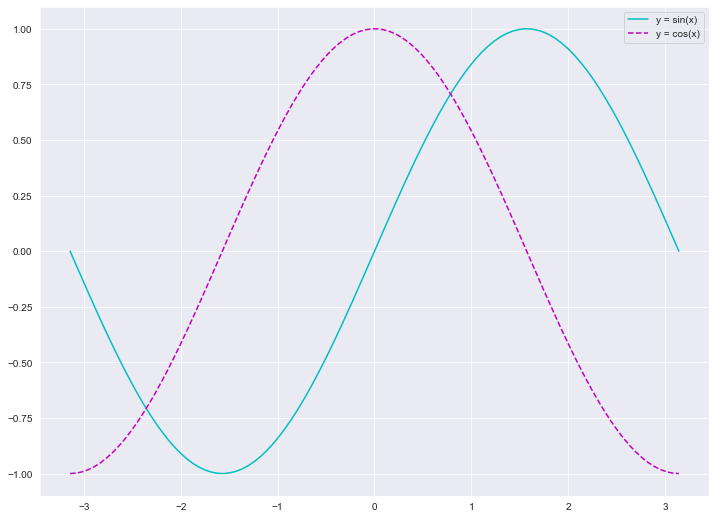

In [503]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, color = 'c')
plt.plot(x, y2, linestyle='--', color = 'm')
plt.legend(["y = sin(x)", 'y = cos(x)'])
plt.grid(True)
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

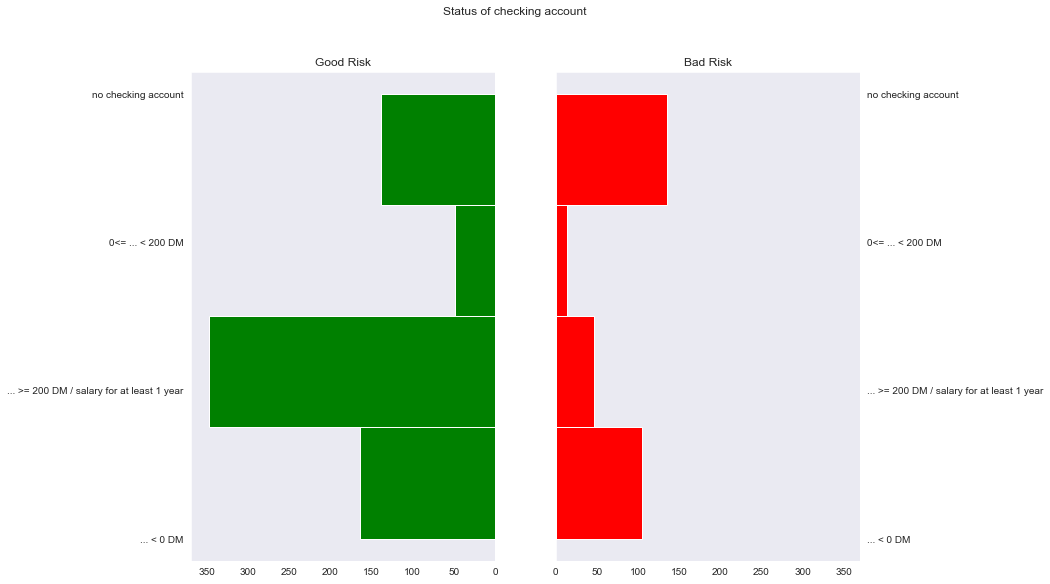

In [504]:
plt.suptitle('Status of checking account')
plt.subplot(1, 2, 1)
plt.hist(
    data['status'][data['credit_risk']=='good'].sort_values(),
    orientation='horizontal',
    color = 'g',
    bins = 4
)
plt.xlim(370, 0)
plt.grid(False)
plt.title('Good Risk')

plt.subplot(1, 2, 2)
plt.hist(
    data['status'][data['credit_risk']=='bad'].sort_values(),
    orientation='horizontal',
    color='r',
    bins = 4
)
plt.xlim(0, 370)
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.grid(False)
plt.title('Bad Risk')
plt.show()


каким должен получиться график:

<img src="2.png " width="1000" height = "700" >

### Задание 8  (0.5 балла)

In [505]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

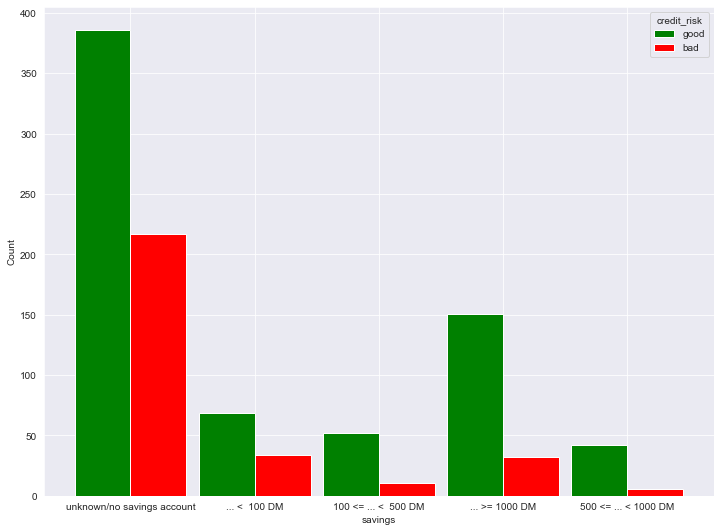

In [506]:
sns.histplot(x = 'savings', data = data, hue = 'credit_risk', multiple="dodge", shrink=0.9, alpha = 1, palette=['g', 'r'])
plt.show()

С помощью seaborn строить графики быстрее, гораздо менее трудозатратно. Оба способа являются наглядными, однако мне больше нравится второй, т.к. с его помощью проще выдвигать гипотезы.

example:
<img src="3.png " width="700" height = "400" >

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

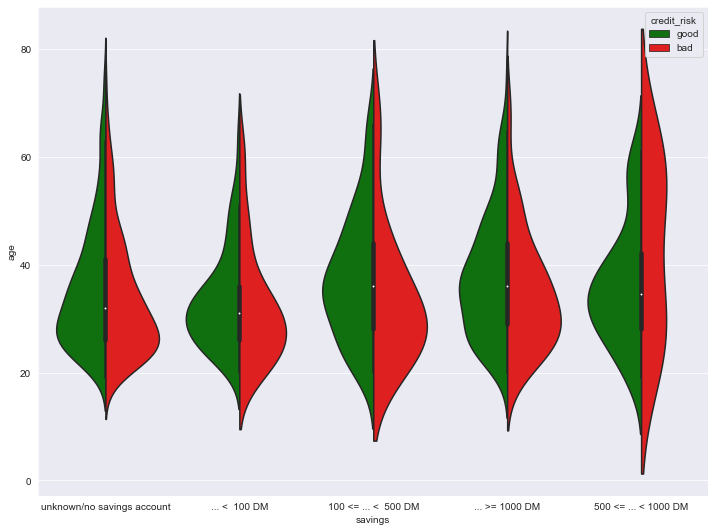

In [507]:
sns.violinplot(data = data, x = 'savings', y = 'age', hue = 'credit_risk', split=True, palette=['g', 'r'])
plt.show()

example:
<img src="5.png " width="800" height = "500" >

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

C:\Users\81E4~1\AppData\Local\Temp/ipykernel_23956/735765959.py:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax[0], ax[1], ax[2]],
C:\Users\81E4~1\AppData\Local\Temp/ipykernel_23956/735765959.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


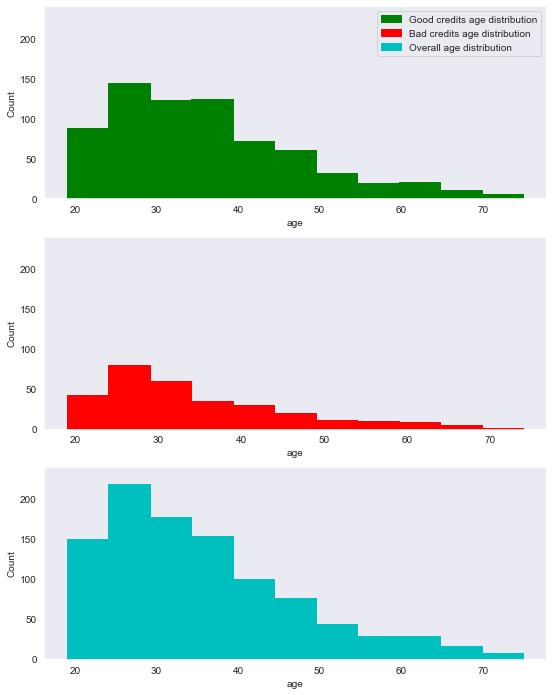

In [508]:
fig, ax = plt.subplots(3, 1, figsize = (9, 12))
for i in range(3):
    ax[i].set_ylim(0, 240)
    ax[i].grid(False)
sns.histplot(data[data['credit_risk']=='good']['age'], ax = ax[0], bins=11, element='step', color = 'g', alpha = 1)
sns.histplot(data[data['credit_risk']=='bad']['age'], ax = ax[1], bins=11, element='step', color = 'r', alpha = 1)
sns.histplot(data['age'], ax = ax[2], bins=11, element='step', color = 'c', alpha = 1)
fig.legend([ax[0], ax[1], ax[2]],
           labels = ['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'],
           loc = 'upper right',
           bbox_to_anchor=(0.4, 0.38, 0.5, 0.5)
)
fig.show()

example:
<img src="6.png " width="800" height = "900" >

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

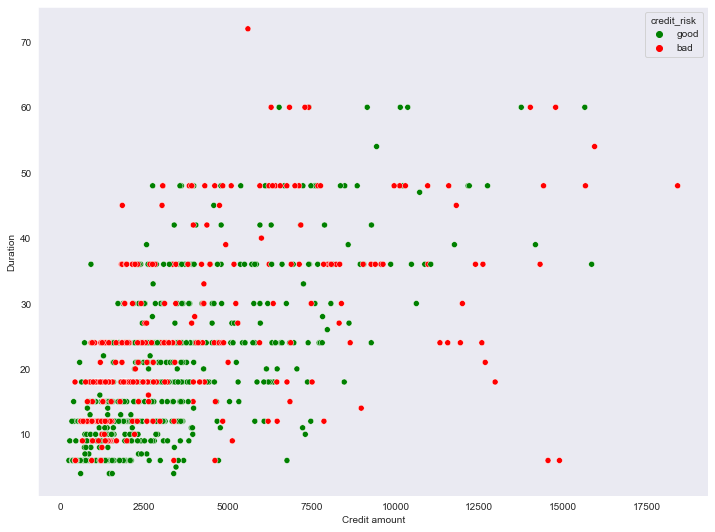

In [509]:
sns.scatterplot(x = data['amount'], y = data['duration'], data = data, hue='credit_risk', palette=['g', 'r'])
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.grid(False)
plt.show()

example:
<img src="4.png " width="800" height = "400" >

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

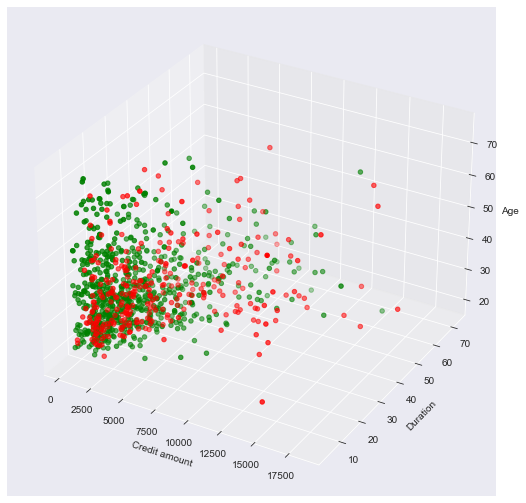

In [510]:
plot_axes = plt.axes(projection = '3d')

data1 = data[data['credit_risk']=='bad']
data2 = data[data['credit_risk']=='good']

plot_axes.scatter3D(data1['amount'], data1['duration'], data1['age'], c = 'r')
plot_axes.scatter3D(data2['amount'], data2['duration'], data2['age'], c = 'g')

plot_axes.set_xlabel('Credit amount')
plot_axes.set_ylabel('Duration')
plot_axes.set_zlabel('Age')

plt.show()

example:
<img src="7.png " width="500" height = "500" >

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [511]:
data = pd.read_csv('german_credit.csv')
new_data = data
def transformate(x_massive, ndata):
    for x in x_massive:
        print('in column', x, ':')
        unique_vals = sorted(ndata[x].unique())

        #На этом этапе при первом запуске проверим, подходит ли данная автоматическая сортировка по алфавиту. Да, для бинарных подходит. Также подходит для number_credits, но тогда вес должен быть отрицательным, т.к. чем больше кредитов, тем хуже.


        #нелогично сортируется по возрастанию для многих порядковых. Расставим приоритетность вручную
        if x == 'savings':
            unique_vals = ['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM']
        elif x == 'employment_duration':
            unique_vals = ['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs']
        elif x == 'status':
            unique_vals = ['no checking account', '... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year']
        elif x == 'present_residence':
            unique_vals = ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs']
        elif x == 'job':
            unique_vals = ['unemployed/unskilled - non-resident', 'unskilled - resident', 'skilled employee/official', 'manager/self-empl./highly qualif. employee']
        elif x == 'installment_rate':
            unique_vals = ['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35']

        #перезаписываем значения
        for i in unique_vals:
            ndata.loc[ndata[x] == i, x] = unique_vals.index(i)
            print(unique_vals.index(i), ' - ', i)
    return(ndata)

x_massive = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk', 'savings', 'employment_duration', 'status', 'installment_rate', 'present_residence', 'number_credits', 'job']
transformate(x_massive, new_data)

new_data = new_data.drop(['purpose', 'personal_status_sex', 'housing', 'credit_history', 'property', 'other_installment_plans', 'other_debtors'], axis = 1)
new_data

in column people_liable :
0  -  0 to 2
1  -  3 or more
in column telephone :
0  -  no
1  -  yes (under customer name)
in column foreign_worker :
0  -  no
1  -  yes
in column credit_risk :
0  -  bad
1  -  good
in column savings :
0  -  unknown/no savings account
1  -  ... <  100 DM
2  -  100 <= ... <  500 DM
3  -  500 <= ... < 1000 DM
4  -  ... >= 1000 DM
in column employment_duration :
0  -  unemployed
1  -  < 1 yr
2  -  1 <= ... < 4 yrs
3  -  4 <= ... < 7 yrs
4  -  >= 7 yrs
in column status :
0  -  no checking account
1  -  ... < 0 DM
2  -  0<= ... < 200 DM
3  -  ... >= 200 DM / salary for at least 1 year
in column installment_rate :
0  -  < 20
1  -  20 <= ... < 25
2  -  25 <= ... < 35
3  -  >= 35
in column present_residence :
0  -  < 1 yr
1  -  1 <= ... < 4 yrs
2  -  4 <= ... < 7 yrs
3  -  >= 7 yrs
in column number_credits :
0  -  1
1  -  2-3
2  -  4-5
3  -  >= 6
in column job :
0  -  unemployed/unskilled - non-resident
1  -  unskilled - resident
2  -  skilled employee/official
3  - 

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,0,2,0,0,0,1
1,0,9,2799,0,2,2,1,36,1,2,1,0,0,1
2,1,12,841,1,3,2,3,23,0,1,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,1,0,1,1
4,0,12,2171,0,2,0,3,38,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,2,3,21,0,1,1,0,0,0
996,0,24,2303,0,4,0,0,45,0,2,0,0,0,0
997,3,21,12680,4,4,0,3,30,0,3,0,1,0,0
998,1,12,6468,4,0,2,0,52,0,3,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

# Гипотезы

1. Зависимость от накоплений (savings). При unknown - больше всего как положительных, так и отрицательных взятий кредита. При счете >=1000 разрыв между good - bad очень большой, почти в 3 раза -> вероятнее всего кредит вернут. Так же в 3 раза отличаются 100-..-500 и 500-..-1000, а у неизвестных аккаунтов и имеющих <100 разница между bad-good - в 2 раза. Отношения положит. к отриц.: unknown 2:1, >=1000 6:1, <100: 2:1, 100..500 5:1, 500..1000 10:1
2. Возраст. Больше всего кредитов берут в ~30. Если более 70 лет и менее 19 - вероятнее всего отрицательный кейс. Стоит обратить внимание на возраст 18-35 - больше всего bad credits.
3.  Длительность и размер. Если до 2500 и менее 10 лет - отлично! В принципе до 10 лет вероятнее всего положительный исход. Можно заметить линенйную зависимость с коэффициентом ~137 для отрицательных.

In [512]:
data = new_data
from sklearn import preprocessing
def predict(Xtest: np.array) -> np.array:

    X = pd.DataFrame(data = Xtest, columns=data.drop('credit_risk', axis = 1).columns)

    X['new'] = np.where((X['savings'] == 3), X['savings'] * .33, (X['savings'] - 1) * .4)
    X['new'] = np.where(1 - abs(X['new']) > 0.5, 1, 0)
    X['new'] = np.where((X['amount'] >= 11300), 0, X['new'])

    #сумма менее 2500 - ок
    X['new'] = np.where((X.amount <2500), 1, X.new)

    #ДЛИТЕЛЬНОСТЬ БОЛЕЕ 47 ЛЕТ
    X['new'] = np.where(X.duration > 47, 0, X.new)

    X.new = np.where((X.duration > 25) & (X.amount / X.duration < 120), 0, X.new)
    X.new += X.number_credits * 0.35
    X.new = np.where(abs(X['new'] -1) < 0.99, 1, 0)
    #X.new = np.where(X.age > 70, 0, X.new)
    #X['new'] = np.where(1 - abs(X['new']) > 0.5, 1, 0)


    return (X['new'].astype(np.int64).round())


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', axis = 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
accuracy_score(y_test.astype(np.int64), predict(X_test))


0.688

Таким образом, подобрав параметры по накоплениям, размеру кредита, длительности, кол-ву кредитов, я сделала предсказывание с точностьью 0.688